In [1]:
%config Completer.use_jedi = False #for switching on auto complete

In [2]:
from sklearn.datasets import load_boston

In [3]:
df=load_boston()

In [4]:
x=df.data

In [5]:
y=df.target

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [8]:
# standarise data
from sklearn.preprocessing import StandardScaler

In [9]:
std=StandardScaler()

In [10]:
std.fit(x_train)

StandardScaler()

In [11]:
x_train_std=std.transform(x_train)
x_test_std=std.transform(x_test)

In [12]:
from tensorflow import keras

In [13]:
# build network
from keras.models import Sequential
from keras.layers import Dense

In [1]:
# build network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [15]:
model=Sequential()
model.add(Dense(40,activation='relu',name="H1"))#first hidden layer
model.add(Dense(30,activation='relu',name="H2"))#2nd hidden layer
model.add(Dense(30,activation='relu',name="H3"))#3rd hidden layer
model.add(Dense(20,activation='relu',name="H4"))#4th hidden layer
model.add(Dense(1,activation='relu'))#output layer

In [16]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [17]:
from livelossplot import PlotLossesKeras

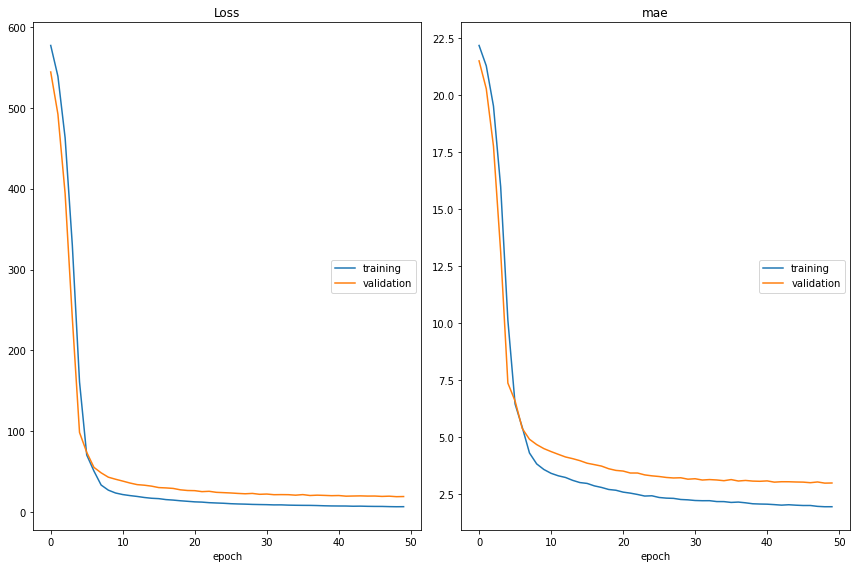

Loss
	training         	 (min:    6.784, max:  577.051, cur:    6.858)
	validation       	 (min:   19.220, max:  544.265, cur:   19.391)
mae
	training         	 (min:    1.950, max:   22.186, cur:    1.951)
	validation       	 (min:    2.986, max:   21.510, cur:    2.992)
12/12 [==============================] - 0s 31ms/step - loss: 6.8583 - mae: 1.9511 - val_loss: 19.3912 - val_mae: 2.9922


In [19]:
model.fit(x_train_std,y_train,epochs=50,validation_data=(x_test_std,y_test),callbacks=[PlotLossesKeras()])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
H1 (Dense)                   multiple                  560       
_________________________________________________________________
H2 (Dense)                   multiple                  1230      
_________________________________________________________________
H3 (Dense)                   multiple                  930       
_________________________________________________________________
H4 (Dense)                   multiple                  620       
_________________________________________________________________
dense_4 (Dense)              multiple                  21        
Total params: 3,361
Trainable params: 3,361
Non-trainable params: 0
_________________________________________________________________


In [23]:
z=model.predict(x_train_std)

In [24]:
z.shape

(379, 1)

In [29]:
#z[:,0]

In [27]:
y_train_pred=model.predict(x_train_std)[:,0]

In [28]:
y_test_pred=model.predict(x_test_std)[:,0]

In [30]:
from sklearn.metrics import r2_score

In [31]:
r2_score(y_train,y_train_pred)

0.9230071516765713

In [32]:
r2_score(y_test,y_test_pred)

0.7626509949397806

# Regularize model

In [33]:
from keras.layers import Dropout
from keras import regularizers

In [46]:
model=Sequential()
model.add(Dense(40,activation='relu',kernel_regularizer=regularizers.l2(0.5),name="H1"))#first hidden layer
model.add(Dense(30,activation='relu',kernel_regularizer=regularizers.l2(0.5),name="H2"))#2nd hidden layer
model.add(Dense(30,activation='relu',kernel_regularizer=regularizers.l2(0.5),name="H3"))#3rd hidden layer
model.add(Dense(20,activation='relu',kernel_regularizer=regularizers.l2(0.5),name="H4"))#4th hidden layer
model.add(Dense(1,activation='relu'))#output layer

In [47]:
model.compile(loss='mse',optimizer='adam',metrics=['mae'])

In [48]:
#model.compile(loss='mse',optimizer='adam',metrics=['mae'])

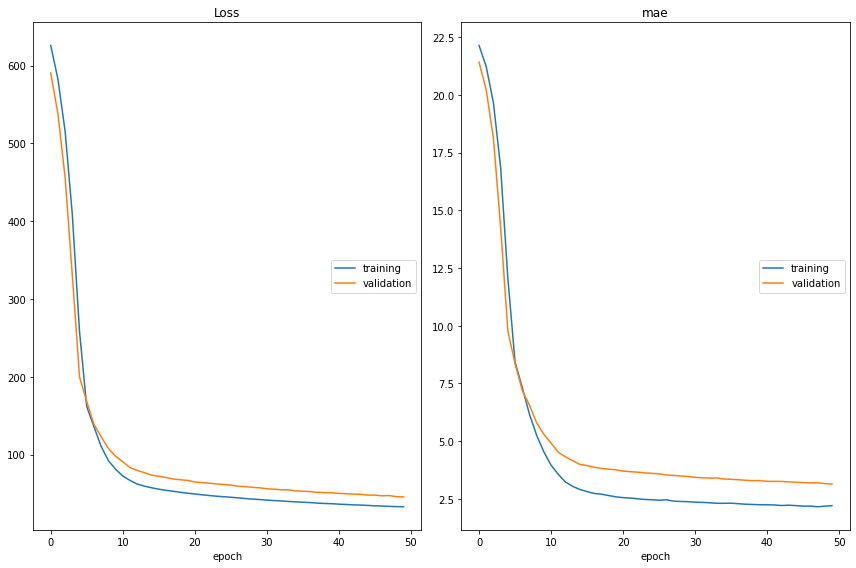

Loss
	training         	 (min:   33.036, max:  625.943, cur:   33.036)
	validation       	 (min:   45.651, max:  590.556, cur:   45.651)
mae
	training         	 (min:    2.157, max:   22.143, cur:    2.203)
	validation       	 (min:    3.142, max:   21.420, cur:    3.142)
12/12 [==============================] - 0s 33ms/step - loss: 33.0360 - mae: 2.2035 - val_loss: 45.6511 - val_mae: 3.1422


In [49]:
model.fit(x_train_std,y_train,epochs=50,validation_data=(x_test_std,y_test),callbacks=[PlotLossesKeras()])

In [50]:
print("Train Score: ",r2_score(y_train,model.predict(x_train_std)[:,0]))
print("Test Score: ",r2_score(y_test,model.predict(x_test_std)[:,0]))

Train Score:  0.8940243628028792
Test Score:  0.7272626356573787
